# Flight Price Prediction

## Overview
The objective of the study is to analyse the flight booking dataset obtained from `Ease My Trip`website and to conduct various statistical hypothesis tests in order to get meaningful information from it. The 'Linear Regression' statistical algorithm would be used to train the dataset and predict a continuous target variable. `Easemytrip` is an internet platform for booking flight tickets, and hence a platform that potential passengers use to buy tickets. A thorough study of the data will aid in the discovery of valuable insights that will be of enormous value to passengers.

## Dataset 
<a href="https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction" target="_blank">(Source)</a>

Dataset contains information about flight booking options from the website Easemytrip for flight travel between India's top 6 metro cities. There are 300261 datapoints and 11 features in the cleaned dataset.
<br>

### Features
The various features of the cleaned dataset are explained below:
1) Airline: The name of the airline company is stored in the airline column. It is a categorical feature having 6 different airlines.
2) Flight: Flight stores information regarding the plane's flight code. It is a categorical feature.
3) Source City: City from which the flight takes off. It is a categorical feature having 6 unique cities.
4) Departure Time: This is a derived categorical feature obtained created by grouping time periods into bins. It stores information about the departure time and have 6 unique time labels.
5) Stops: A categorical feature with 3 distinct values that stores the number of stops between the source and destination cities.
6) Arrival Time: This is a derived categorical feature created by grouping time intervals into bins. It has six distinct time labels and keeps information about the arrival time.
7) Destination City: City where the flight will land. It is a categorical feature having 6 unique cities.
8) Class: A categorical feature that contains information on seat class; it has two distinct values: Business and Economy.
9) Duration: A continuous feature that displays the overall amount of time it takes to travel between cities in hours.
10)Days Left: This is a derived characteristic that is calculated by subtracting the trip date by the booking date.
11) Price: Target variable stores information of the ticket price.

## Data Exploration

#### Importing Necessary Libraries

In [1]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint

#### Reading the Dataset

In [2]:
df = pd.read_csv("Clean_Dataset.csv")

In [3]:
df

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


<br>

So, from the dataset, we can deduce the following:
- We have to drop the 'Unnamed: 0' column as it is of no use. It is just an index column.
- For columns: 'airline','source_city','departure_time','stops','arrival_time','destination_city','class', we have to one-hot encode them or create dummy variables on the basis of their value counts(which we check in the upcoming cells).
- For 'flight', we might have to drop some parts like the 'SG', or the 'UK' from the values.
- Out of all the values, the "Class" column in the most important column. Also 'days_left' is pretty important as Flight prices are dynamic in nature and they vary a lot on the basis of days left till departure.

#### Value Counts

In [4]:
df['airline'].value_counts()

airline
Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

There are only 6 airlines. So, it makes sense to one-hot encode the values.

In [5]:
df['source_city'].value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: count, dtype: int64

In [6]:
df['destination_city'].value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: count, dtype: int64

So, as we can see, we do not have a whole lot of airlines, source city and destination city. Hence, we can just one-hot encode all of them.

In [7]:
df['departure_time'].value_counts()

departure_time
Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: count, dtype: int64

In [8]:
df['arrival_time'].value_counts()

arrival_time
Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: count, dtype: int64

In these cases too, we can just simply one-hot encode these values.

In [9]:
df['stops'].value_counts()

stops
one            250863
zero            36004
two_or_more     13286
Name: count, dtype: int64

This column only has 3 values. <br><br>
So we do the following for the columns:
- One-Hot Encode: airline	source_city	departure_time	arrival_time	destination_city
- Turn:	stops into a Numerical Feature (0-2)
- Turn: Class into a Binary Feature
- Drop:  Unnamed: 0,	flight
- Keep: duration	days_left	price as it is.

## Data Preprocessing

#### Dropping the unnecessary features

In [10]:
df = df.drop('Unnamed: 0',axis=1)
df = df.drop('flight',axis=1)

#### One-Hot Encoding

In [11]:
df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)

In [12]:
def stop_func(x):
    if x=='zero':
        return (0)
    elif x=='one':
        return (1)
    else:
        return (2)


df['stops'] = df['stops'].apply(stop_func)

Creating Dummy Variables:

In [13]:
df=pd.concat([df.drop('airline',axis=1),pd.get_dummies(df['airline']).add_prefix("airline_").map(lambda x: 1 if x else 0)],axis=1)
df=pd.concat([df.drop('source_city',axis=1),pd.get_dummies(df['source_city']).add_prefix("source_city_").map(lambda x: 1 if x else 0)],axis=1)
df=pd.concat([df.drop('destination_city',axis=1),pd.get_dummies(df['destination_city']).add_prefix("destination_city_").map(lambda x: 1 if x else 0)],axis=1)
df=pd.concat([df.drop('departure_time',axis=1),pd.get_dummies(df['departure_time']).add_prefix("departure_time_").map(lambda x: 1 if x else 0)],axis=1)
df=pd.concat([df.drop('arrival_time',axis=1),pd.get_dummies(df['arrival_time']).add_prefix("arrival_time_").map(lambda x: 1 if x else 0)],axis=1)
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,departure_time_Evening,departure_time_Late_Night,departure_time_Morning,departure_time_Night,arrival_time_Afternoon,arrival_time_Early_Morning,arrival_time_Evening,arrival_time_Late_Night,arrival_time_Morning,arrival_time_Night
0,0,0,2.17,1,5953,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,2.33,1,5953,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,2.17,1,5956,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,0,2.25,1,5955,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,2.33,1,5955,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
300148,1,1,10.08,49,69265,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
300149,1,1,10.42,49,77105,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300150,1,1,13.83,49,79099,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
300151,1,1,10.00,49,81585,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


As, we can see, we only have numerical and categorical value. <br>
With this, the pre-processing of our data is done.

## Training Model

#### Splitting our data

In [14]:
X = df.drop('price',axis=1)
y = df['price']
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2)

#### Model

In [15]:
rfg=RandomForestRegressor(n_jobs=-1)
rfg.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [16]:
rfg.score(X_test,y_test)

0.9852997349982402

## Evaluating Model

In [17]:
y_pred = rfg.predict(X_test)

#### Scores

In [18]:
print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred) )
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred) )
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  0.9852997349982402
Mean Absolute Error:  1066.83386537153
Mean Squared Error:  7540520.0570903355
Root Mean Squared Error:  2746.000738727201


#### Graph of Actual v/s Predicted Price

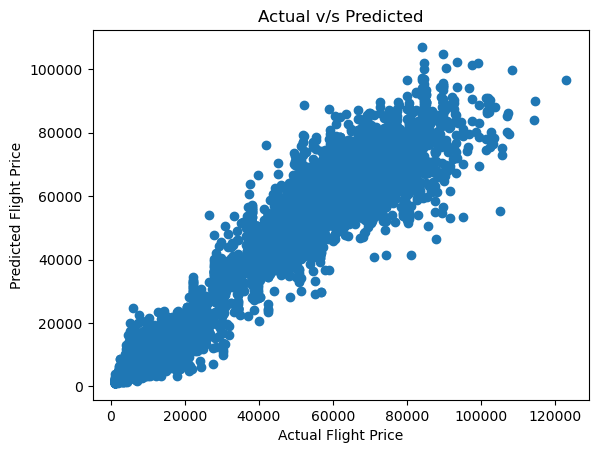

In [19]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual Flight Price")
plt.ylabel("Predicted Flight Price")
plt.title("Actual v/s Predicted")
plt.show()

From the graph we can see, in some cases our predicted price is quite off. However, overall the points are lying pretty close to a straight line. We can say that the variance is not too much, which means the model is performing quite decently and not making absurd predictions.

#### Importance of Features

In [20]:
importances = dict(zip(rfg.feature_names_in_,rfg.feature_importances_))
#sorted_importances = {k: v for k,v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}
sorted_importances = sorted(importances.items(), key=lambda x: x[1], reverse = True)

In [21]:
sorted_importances

[('class', 0.8797889002399422),
 ('duration', 0.05772204155121623),
 ('days_left', 0.018468400579504746),
 ('airline_Air_India', 0.0055543169086151945),
 ('airline_Vistara', 0.004495863972234381),
 ('source_city_Delhi', 0.003524266607068414),
 ('destination_city_Delhi', 0.003143407504713526),
 ('source_city_Mumbai', 0.0022926591217055717),
 ('destination_city_Mumbai', 0.001972359250794805),
 ('stops', 0.0019083705890850162),
 ('destination_city_Kolkata', 0.0018757360559498455),
 ('source_city_Kolkata', 0.0017269699975199868),
 ('destination_city_Hyderabad', 0.0015812177598743258),
 ('arrival_time_Evening', 0.0014599169561552332),
 ('source_city_Hyderabad', 0.0013411991844486672),
 ('destination_city_Bangalore', 0.0012666057802067337),
 ('arrival_time_Night', 0.0012065203159042361),
 ('source_city_Bangalore', 0.0011314515767509251),
 ('departure_time_Evening', 0.0011313053921955137),
 ('arrival_time_Afternoon', 0.0009601840068509608),
 ('source_city_Chennai', 0.0009510456429476407),
 ('

From the above output we can see, the price heavily depends on the class of travel, which coincides with the norms. A buisness class ticket has to cost more than an economy seat.<br>
Apart from class, duration of flight and Days left from departure also play a significant role.<br>
The choice of airline doesn't affect a lot. Surprisingly, the number of stops is quite insignificant.

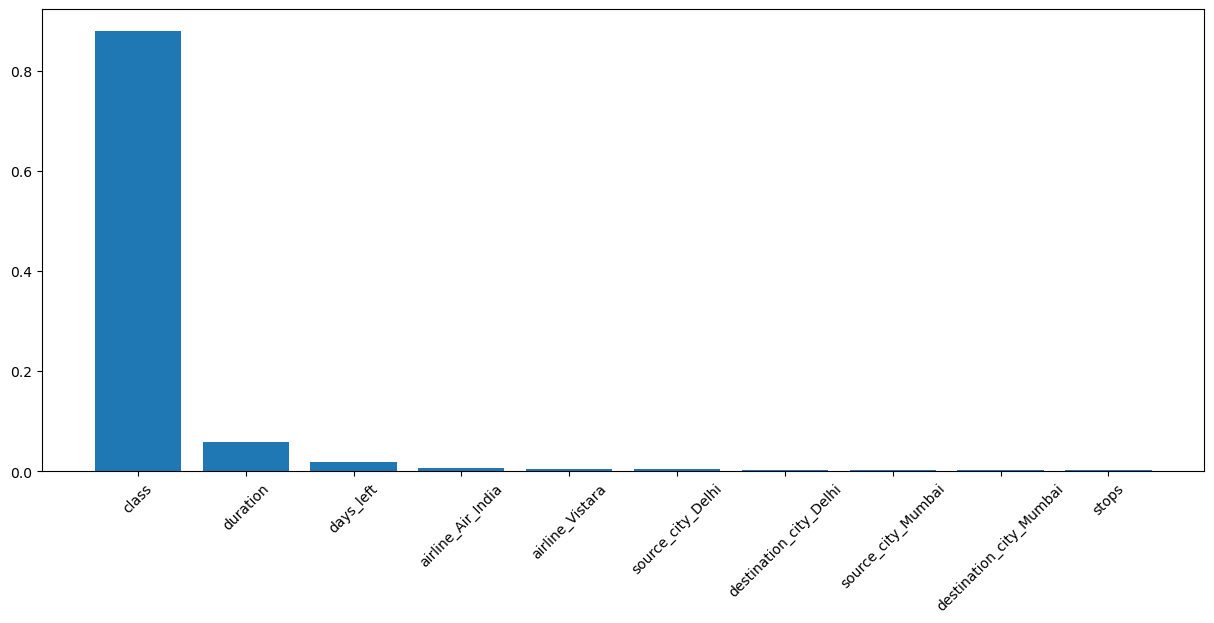

In [22]:
plt.figure(figsize=(15,6))
plt.bar([x[0] for x in sorted_importances[:10]], [x[1] for x in sorted_importances[:10]])
plt.xticks(rotation=45);

## Hyperparameter Tuning

#### Setting Up the parameter grid and RandomizedSearchCV

In [23]:
param_dist = {
    'n_estimators': randint(100,300),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': randint(2,11),
    'min_samples_leaf': randint(1,5),
    'max_features': [1.0,'log2', 'sqrt']
}

rfr = RandomForestRegressor(n_jobs=-1)

random_search = RandomizedSearchCV(estimator=rfr, param_distributions=param_dist, n_iter=2,cv=3,
                                  scoring='neg_mean_squared_error',verbose= 2, n_jobs= -1)

random_search.fit(X_train,y_train)

best_regressor = random_search.best_estimator_

Fitting 3 folds for each of 2 candidates, totalling 6 fits


In [24]:
best_regressor.score(X_test,y_test)

0.963489182561923

In [25]:
y_pred = best_regressor.predict(X_test)

print("R2 Score: ",r2_score(y_test,y_pred))
print("Mean Absolute Error: ",mean_absolute_error(y_test,y_pred) )
print("Mean Squared Error: ",mean_squared_error(y_test,y_pred) )
print("Root Mean Squared Error: ", math.sqrt(mean_squared_error(y_test,y_pred)))

R2 Score:  0.963489182561923
Mean Absolute Error:  2410.8664057847745
Mean Squared Error:  18728271.303927187
Root Mean Squared Error:  4327.617277894059


So, as we can see the model performs pretty well with a high R2 Score. Even though using the Randomized Search CV did not increase the R2 score a lot, or decrease the errors a lot, we still get a pretty accuarate regression Model.
<br>



## Authors
<a href="https://www.linkedin.com/in/kinjal-mitra-992147325/" target="_blank">Kinjal Mitra</a>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By | 
| ----------------- | ------- | ---------- | 
| 2024-12-24        | 1.0     | Kinjal Mitra |